# Tensorflow for exams

In this project we will use the popular library **Tensorflow** to predict the results of some students.

We will also use the libraries **NumPy**, **Pandas**, **matplotlib** and **scikt-learn**.


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

### Load and inspect the data

We start this project loading the datas from a csv file, checking the dimension and properties of this dataset and the presence of NA values.

In [118]:
df = pd.read_csv("Exam_Score_Prediction.csv")
df.head()
df.isna().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  float64
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 2.0+ MB


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.500000,20.473300,4.007604,70.017365,7.00856,62.513225
std,5770.211372,2.284458,2.308313,17.282262,1.73209,18.908491
min,200.990000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,19800.010000,24.000000,7.910000,99.400000,9.90000,100.000000


### EDA 

Since the data are already clean we may visualize

-) The histogram of frequency of grades

-) The relationship between study hours and exam score

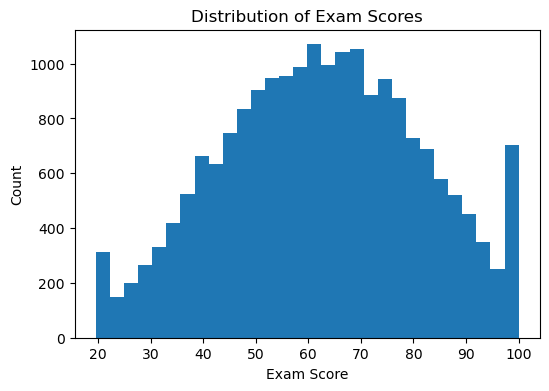

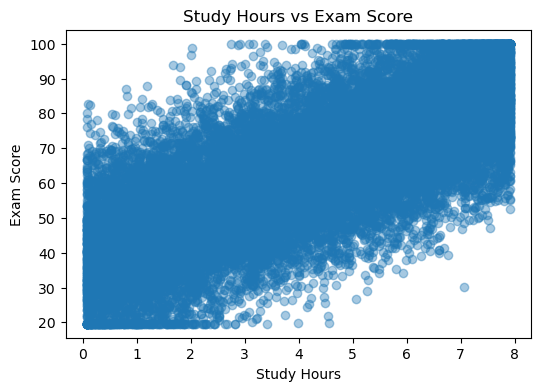

In [119]:
# Histogram
plt.figure(figsize=(6, 4))
plt.hist(df["exam_score"], bins=30)
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.title("Distribution of Exam Scores")
plt.show()

# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df["study_hours"], df["exam_score"], alpha=0.4)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()

### Data preprocessing and encoder

We now preprocess and encode the data.

We will drop the `student_id` column, separate features (X) and target (y) (i.e. the mark), do the one-hot encode categorical variables and split into train and test sets.


In [120]:
# Drop ID column if present
if "student_id" in df.columns:
    df = df.drop(columns=["student_id"])

y = df["exam_score"].values
X = df.drop(columns=["exam_score"])
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

# One hot encoder
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded.values,y, test_size=0.2,random_state=42)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Categorical columns: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
Numerical columns: ['age', 'study_hours', 'class_attendance', 'sleep_hours']
Shape before encoding: (20000, 11)
Shape after encoding: (20000, 23)
Train shape: (16000, 23) (16000,)
Test shape: (4000, 23) (4000,)


### A simple neural network 

We now define our neural network, the input will be modelized on X_train.shape[1] and the intermediate layers will be of 64, 32 and 1 nodes (the last one will be our output)

In [121]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)])

model.compile(optimizer="adam",loss="mse",metrics=["mae"])

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

### Train and valuate the model

We train now the model using the given neural network and we compute the MSE and MAE by using **Keras** metrics.


In [124]:
model.fit(X_train, y_train, epochs=50,batch_size=32, validation_split=0.2, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_loss:.3f}")
print(f"Test MAE (from Keras): {test_mae:.3f}")
r2 = r2_score(y_test, model.predict(X_test))
print("R² Score:", r2)

Test MSE: 98.228
Test MAE (from Keras): 8.002
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R² Score: 0.7253890037536621
